# Week 2 -- Probability 

<img align="right" style="padding-right:10px;" src="figures_wk2/stats_cover.png" width=200><br>

**Resources and References**
>**Practical Statistics for Data Scientists, 2nd Edition**<br>
>by Peter Bruce, Andrew Bruce, Peter Gedeck<br>
>Publisher: O'Reilly Media, Inc.<br>
>Release Date: May 2020<br>
>ISBN: 9781492072942<br>

<br>
<br>


>**Probability for Machine Learning**<br>
>by Jason Brownle<br>
>https://machinelearningmastery.com/probability-for-machine-learning/
<img align="right" style="padding-right:10px;" src="figures_wk2/probability_cover.png" width=200><br>

## Data Sampling and Distribution

### Bias and Random Sampling

**Sample**-- subset of data taken from larger data set (usually called a **Population.** NOTE: Different from a population in biology).<br>
**Population** -- Larger data set (real or theoretical).<br>
**N(n)** -- size of population or sample. <br>
**Random Sampling** -- Create a sample by randomly drawing elements from population.<br>
**Bias** -- Systemic error<br>
**Sample Bias** -- Sample that misrepresents the population.<br>
* Recent example: 2016 US. Presidential election polls that placed Hillary Clinton ahead of Donald Trump. **Sample bias** was one of the contributing factors to the incorrect predictions. (Source: "Harvard Researchers Warn 2016 Polling Mistakes Serve as a 'Cautionary Tale' in 2020" retrieved from https://www.thecrimson.com/article/2020/11/2/2016-election-polls-kuriwaki-isakov/)


#### Bias

Error due to bias represents something wrong with the data collection or selection system itself. In the "Practical Statistics for Data Scientists" book referenced above, the authors use the analogy of two guns shooting at a target X-Y axis:

<table style="font-size: 20px">
    <tr>
        <th>True Aim</th><th>Biased Aim</th>
    </tr>
    <tr>
        <td><img src="figures_wk2/true_aim.png"></td><td><img src="figures_wk2/bias_aim.png"></td>
    </tr>
</table>

The "True Aim" picture shows us the result of random errors whereas the pattern we see in the "Biased Aim" graph 

#### Selection and Self-selection bias

**Selection bias**: Refers to choosing data favorable to a particular conclusion, whether done deliberately or accidentally. 

**Self-selection bias**: Product or place reviews on social media or "review sites" like Yelp are not a good source of sample data. These types of reviews are not random -- rather, reviewers typically have a reason for self-selecting. Many times due to either a very good or very bad experience and thus represents a biased sample. 

It is worth noting that most non-compulsory surveys suffer from this same bias. Think of end of course surveys. Only a small number of course attendees usually take the time and effort to fill out a survey, and then usually only due to an extremely good or extremely bad course experience. 

#### Random Selection

George Gallup proposed random selection as a scientific sampling method after the *Literary Digest* poll of 1936 famously predicted the incorrect outcome of Alf Landon winning the presidential election over Franklin Roosevelt. 

**Population**<br>
A vital point is to correctly define the population from which the sample will be drawn. For example:<br>
* Surveying 100 random customers to walk in the door of a grocery store may yield an acceptible sample for learning public opinion about general products. 
* Surveying 100 random men to walk in the grocery store about feminine hygiene products will probably yield a less than optimal result.

Data quality and appropriate sampling is often more important than data quantity. 

### Sampling Distribution

**Data Distribution:** Distribution of a sample's *individual data points*.

**Sampling Distribution:** Distribution of a sample statistic, such as mean. Tends to be more regular and bell-shaped than the data itself. 

Below is an example of this, recreated from *Practical Statistics for Data Scientists, 2nd Edition*, using Lending Club data. 

In [5]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

sns.set()

In [6]:
loans_income = pd.read_csv("data/loans_income.csv", squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

        income  type
38798  51000.0  Data
47991  45000.0  Data
9912   62000.0  Data
29199  26000.0  Data
27846  55000.0  Data


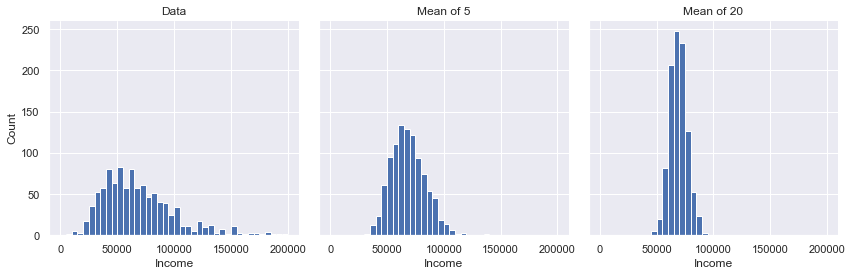

In [7]:
g = sns.FacetGrid(results, col='type', col_wrap=3, 
                  height=4, aspect=1)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

* The first graph is the mean of 1000 values.
* The second graph is 1000 means of 5 values.
* The third graph is 1000 means of 20 values.

#### Central Limit Theorem

The **central limit theorem** states that means of multiple samples will be a bell-shaped curve, even if the population isn't normally distributed, if sample size is large enough and not too far off of normal.

### Normal (Gaussian) Distribution

**Standard Normal Distribution**
<img style="padding-right:10px;" src="figures_wk2/normal_distribution.png"><br>

---

$ \mu = $ The population mean.


Many statistical tests, **such as t-distributions and hypothesis testing**, assume sample statistics are normally distributed. Simple mathematics exist to compare data to a standard normal distribution, however, for our purposes, a QQ-plot is faster and easier. 

Normality can be checked with a **QQ-plot**. Python's *scipy* package has a QQ-plot function, called `probplot`, seen below:

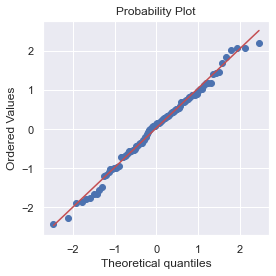

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

The blue markers represent *z-scores*, or standardized data points, plotted vs. standard deviations away from the mean. 


### Long-tailed Distributions

**Tail:** A long, narrow area of a frequency distribution where extreme cases happen with low frequency.<br>
**Skew:** Where one tail of a distribution is longer than another.


Despite the time and effort spent teaching about normal distributions, most data is **not** normally distributed.

An example can be seen with a QQ-plot of Netflix stock data. 

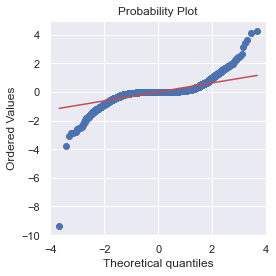

In [8]:
sp500_px = pd.read_csv('data/sp500_data.csv.gz')

nflx = sp500_px.NFLX
# nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

In [9]:
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


Low values are below the line and high values are above the line. This tells us the data is not normally distributed and we are more likely to see extreme values than if it was normally distributed.

Sometimes non-regular data can be normalized using methods like **taking the logarithm of values greater than 0.**

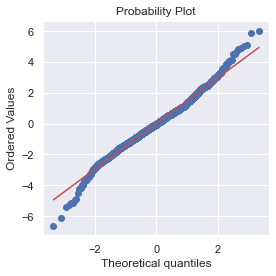

In [10]:
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

You can see that helps significantly, but the data is still not very normal. 

### Binomial (Bernoulli) Distribution

A **binomial outcome** is one for which there are only two possible answers:<br>
* yes / no<br>
* true / false<br>
* buy / don't buy<br>
* click / don't click<br>
* etc.

At its heart, binomial distributions analyze the probability of each outcome under certain conditions. 

The classic example is the coin toss. The outcome will be either heads (H) or tails (T) for any particular toss. 

A **trial** is an event of interest with a discrete outcome (e.g. a coin toss).

A **success** is defined as the outcome of interest in the trials. For example, in the coin toss above, we could say we are interested in the number of H outcomes out of 10 trials (tosses). Each H outcome would be a *success*. Also represented as a "1" (following binary logic).

A **binary distribution** is the number of successes (*x*) in *n* trials with *p* probability of success for each trial. Also called a *Bernoulli distribution*.



#### Calculating Binomial Probabilies

In general, we are concerned with calculating two situations:

1. The probability of *x* successes out of *n* trials. This is called the **probability mass function(pmf).**<br>
2. The probability of **no more than** _x_ successes out of *n* trials. This is called the **cumulative distribution function (cdf).**

Python uses scipy's `stats.binom.pmf()` and `stats.binom.cdf()` functions, respectively, for that functionality. 

**pmf example:** A fair coin has a 50% (.50) chance of coming up heads on a toss. What is the probability of getting a head (H) 7 times out of 10 tosses?

x = 7<br>
n = 10<br>
p = 0.5<br>

In [11]:
stats.binom.pmf(7, n=10, p=0.5)

0.11718750000000014

So, there is an 11.7% chance that a coin will land on heads 7 out of 10 tosses.

**cdf example:** Using that same fair coin, what is the probability of getting a head (H) **_no more than_** four times?

x = 4<br>
n = 10<br>
p = 0.5<br>

In [12]:
stats.binom.cdf(4, n=10, p=0.5)

0.3769531250000001

There is a 37.6% chance that there will be 4 or fewer heads in 10 trials. Which is the same thing as 

`(chance of 0 H) + (chance of 1 H) + (chance of 2 H) + (chance of 3 H) + (chance of 4 H)`

In [13]:
stats.binom.pmf(0, n=10, p=0.5) + stats.binom.pmf(1, n=10, p=0.5) \
+ stats.binom.pmf(2, n=10, p=0.5) + stats.binom.pmf(3, n=10, p=0.5) \
+ stats.binom.pmf(4, n=10, p=0.5)

0.37695312500000033

There are many other useful data distributions. Students are encouraged to to independently research them. 

# Bootstrapping

**Bootstrap sample:** A sample taken with replacement from a data set. <br>
**Resampling:** The process of taking repeated samples from observed data.<br>

Hypothesis testing requires some estimate of the sampling distribution. "Traditional" hypothesis testing requires formulas to create estimates of sampling distributions. *Bootstrapping* creates a sampling distribution through resampling. 
 
Let's take a look. First, we'll find the median income of the Lending Club data.

In [14]:
loans_income.median()

62000.0

Next, we'll use scikit-learn's `resample()` function to take 5 samples and print out the median of each.

In [15]:
for _ in range(5):
    sample = resample(loans_income)
    print(sample.median())

62000.0
62000.0
61200.0
61481.0
62000.0


As you can see, the median is different for each sample. 

Let's take 1000 samples and average the medians and see how different it is from the dataset median.

In [16]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'mean of medians: {results.mean()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
mean of medians: 61927.7055
bias: -72.29450000000361
std. error: 213.41770928952386


Let's use bootstrapping on that wonky Netflix data. We'll take samples of 100 and store the mean of the sample in a list and do that 20,000 times. 

You'll notice that the data looks much more normally distributed even without the logarithm trick.

In [17]:
len(results)

1000

In [18]:
results[90]

62000.0

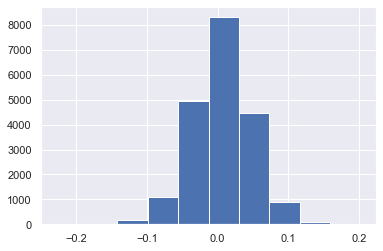

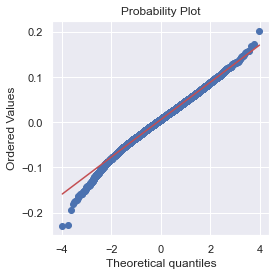

In [19]:
sp500_px = pd.read_csv('data/sp500_data.csv.gz')

nflx = sp500_px.NFLX.values

means = []

for _ in range(20000): 
    mean = resample(nflx, replace=True, n_samples=100).mean()
    means.append(mean)
    
plt.hist(means)

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(means, plot=ax)

plt.tight_layout()
plt.show()

# Probability


**Joint probability:** Probability of two or more events happening at the same time.<br> 
**Marginal probability:** Probability of an event regardless of other variables outcome.<br>
**Conditional probability:** Probability of an event occurring along with one or more other events. <br>

## Probability for one random variable 

Probability shows the likelihood of an event happening. <br>

Probability of one random variable is the likelihood of an event that is independent of other factors. Examples include: <br>
* Coin toss.<br>
* Roll of a dice.<br>
* Drawing one card from a deck of cards. <br>

For random variable `x`, the function `P(x)` relates probabilities to all values of `x`.

<center>$Probability\ Density\ of\ x = P(x)$</center>

If `A` is a specific event of `x`, 

<center>$Probability\ of\ Event\ A = P(A)$</center>

Probability of an event is calculated as *the number of desired outcomes* divided by *total number of possible outcomes*, where all outcomes are equally likely:

<center>$Probability = \frac{the\ number\ of\ desired\ outcomes}{total\ number\ of\ possible\ outcomes}$</center>

If we apply that principle to our examples above:<br>
* Coin toss: Probability of heads = 1 (desired outcome) / 2 (possible outcomes) = .50 or 50%<br>
* Dice roll: Probability of rolling 3 = 1 (specific number) / 6 (possible numbers) = .1666 or 16.66%<br>
* Cards: Probability of drawing 10 ♦ = 1 (specific card) / 52 (possible cards) = .0192 or 1.92%<br>

<center>$Sum of Probabilities\ for\ all\ outcomes\ = 1.0$</center>

---

The probability of an event not occurring is called the **complement** and is calculated:

<center>$Probability\ of\ Event\ not\ occurring = Probability\ of\ all\ outcomes\ - Probability\ of\ one\ outcome$</center>

That is:

<center>$P(not\ A) = 1 - P(A)$</center>

## Probability of multiple random variables

Each **column** in a machine learning data set represents a **variable** and each *row* represents an *observation*. Much of the behind-the-scenes math in machine learning deals the probability of one variable in the presence of the observation's other variables. 

Let's look again at this section's definitions, in light of what we saw above:

**Joint probability:** Probability of events *A* and *B*.<br> 
**Marginal probability:** Probability of event *A* given variable *Y*.<br>
**Conditional probability:** Probability of event *A* given event *B*. <br>

### Joint probability

Joint probability is the chance that **both** event A and event B happen. This can be written several ways:

<center>
$$P(A\ and\ B)$$
$$P(A\ \cap\ B)$$
$$P(A,B)$$
</center>

Joint probability of A and B can be calculated as *the probability of event A given event B times the probability of event B*. In more mathematical terms:

<center>$P(A\ \cap\ B) = P(A\ given\ B)\ \times\ P(B)$</center>




## Marginal probability

For given fixed event *A* and variable *Y*, marginal probability is the sum of probabilities that one of *Y*'s events will happen along with fixed event *A*. Let's look at that in table form.

* Let's say we ask a group of 60 people which color they like better, **blue** or **pink**.

|Gender| Blue|Pink|Total|
|------|-----|----|-----|
|Male|25|10|P(male) = 35 / 60 = 0.5833| 
|Female|5|20|P(female) 25 / 60 = 0.4166|
|Total|P(blue) = 30 / 60 = .50 | P(pink) = 30 / 60 = .50| total = 60

**Rows** represent the probability that a respondent was a particular gender.<br>
**Columns** represent the probability of the response being that color.<br>

To express that more mathematically, 

<center>$P(X=A)=\sum\limits_{}^{y\in Y}P(X=A,\ Y=y)$</center>

## Conditional probability

Remember, in programming languages, we call `if->then->else` statements *conditionals*.

A **conditional probability** can be thought of as **The probability that event A will happen _if_ event B has happened**.

The slightly more "mathy" way to say that is: **The probability of event A _given_ event B.**

In formula form, we use **"|"** (pipe) as the "given."

<center>
    $P(A\ given\ B)$<br>
    or<br>
    $P(A|B)$<br>
    </center>
    
<br><br>
The conditional probability of event A given event B can be calculated by:<br><br>


<center>$P(A|B) = \frac{P(A \cap B)}{P(B)}$</center>


---

**All of the probability above was included simply so we could understand Bayes Theorem (below) and its' application to machine learning.**


# Bayes Theorem

Bayes Theorem gives us a structured way to calculate **conditional probabilities**.

Remember from above, conditional probability is the probability that *event A* will happen *given event B*. In mathematical terms, that is: 

<center>$P(A|B) = \frac{P(A \cap B)}{P(B)}$</center>

Note that $P(A|B) \neq P(B|A)$

**Bayes Theorem** gives us another way to calculate conditional probability when the joint probability is not known: 

<center>$P(A|B) = \frac{P(B|A)\ \times\ P(A)}{P(B)}$</center>


However, we may not know $P(B)$. It can be calculated an alternatve way: 

<center>$P(B)=P(B|A)\ \times\ P(A)\ +\ P(B|not\ A)\ \times\ P(not\ A)$</center><br>

Then, through the mathematical trickery of substitution, we get:<br>

<center>$P(A|B) = \frac{P(B|A)\ \times\ P(A)}{P(B|A)\ \times\ P(A)\ +\ P(B|not\ A)\ \times\ P(not\ A)}$</center>

Also, remember that <br>
<center>$P(not\ A)=1 - P(A)$</center><br>

Finally, if we have $P(not\ B|not\ A)$ we can calculate $P(B|not\ A)$:<br>
<center>$P(B|not\ A) = 1 - P(not\ B|not\ A)$</center>

### Terminology:

The probabilities are given English names to help understand what they are trying to say:

* $P(A|B)$: Posterior probability<br>
* $P(A)$: Prior probability<br>
* $P(B|A)$: Likelihood<br>
* $P(B)$: Evidence<br>

Now, Bayes Theorem can be restated as:
<center>$Posterior = \frac{Likelihood\ \times\ Prior}{Evidence}$</center>

---

Jason Brownlee gives us the fantastic analogy of the probability that there is fire given that there is smoke. 

* $P(Fire)$ is the prior<br>
* $P(Smoke|Fire)$ is the likelihood<br>
* $P(Smoke)$ is the evidence<br>
<center>$P(Fire|Smoke) = \frac{P(Smoke|Fire)\ \times\ P(Fire)}{P(Smoke)}$</center>

# Bayes Theorem as Binary Classifier

Bayes Theorem is often used as a **binary classifier** -- the classic example that we will look at in a few moments is detecting spam in email. But first, more terminology.

## Terminology

* $P(not\ B|not\ A)$: True Negative Rate **TNR** (specificity)<br>
* $P(B|not\ A)$: False Positive Rate **FPR** <br>
* $P(not\ B|A)$: False Negative Rate **FNR** <br>
* $P(B|A)$: True Positive Rate **TPR** (sensitivity or recall) <br>
* $P(A|B)$: Positive Predictive Vale **PPV** (precision) <br>

Applying the above to the longer formula above: 

<center>$Positive\ Predictive\ Value = \frac{True\ Positive\ Rate\ \times\ P(A)}{True\ Positive\ Rate\ \times\ P(A)\ +\ False\ Positive\ Rate\ \times\ P(not\ A) }$</center>

## Examples

Let's look at some (contrived) examples, courtesy of Jason Brownlee:

### Elderly Fall and Death

Let's define elderly as over 80 years of age. What is the probabiity that an elderly person will die from a fall? Let's use 10% as the base rate for elderly death - P(A), and the base rate for elderly falling is 5% - P(B), and 7% of elderly that die had a fall - P(B|A). 

<center>$P(A|B) = \frac{P(B|A)\ \times\ P(A)}{P(B)}$</center><br>

<center>$P(Die|Fall) = \frac{P(Fall|Die)\ \times\ P(Die)}{P(Fall)}$</center><br>
                                                              
<center>$P(A|B) = \frac{0.07\ \times\ 0.10}{0.05}$</center><br>

<center>$P(Die|Fall) = 0.14$</center><br>

So, using these completely fake numbers, 14% of elderly falls would end in death.

### Spam Detection

Let's say our spam filter put an email in the spam folder. What is the probability it was spam?

* 2% of email is spam - P(A).
* 99% accuracy on the spam filter - P(B|A)
* 0.1% of email is incorrectly marked as spam - P(B|not A)

<center>$P(A|B) = \frac{P(B|A)\ \times\ P(A)}{P(B)}$</center><br>

<center>$P(Spam|Detected) = \frac{P(Detected|Spam)\ \times\ P(Spam)}{P(Detected)}$</center><br>

Unfortunately, we don't know P(B) -- P(Detected), but we can figure it out. Recall, 

<center>$P(B)=P(B|A)\ \times\ P(A)\ +\ P(B|not\ A)\ \times\ P(not\ A)$</center><br>

<center>$P(Detected)=P(Detected|Spam)\ \times\ P(Spam)\ +\ P(Detected|not\ Spam)\ \times\ P(not\ Spam)$</center><br>

And, we can calculate P(not Spam):

<center>$P(not\ Spam) = 1 - P(Spam) = 1 - 0.02 = 0.98$</center><br>

<center>$P(Detected) = 0.99\ \times\ 0.02\ +\ 0.001\ \times\
 0.98$</center><br>
 
Remember order of operations here... multiply before addition: <br>
<br>
<center>$P(Detected) = 0.0198 + 0.00098 = 0.02078$</center><br>

We can finally put it all together:<br>

<center>$P(Spam|Detected) = \frac{0.99\ \times\ 0.02}{0.02078}$</center><br>

<center>$P(Spam|Detected) = \frac{0.0198}{0.02078}$</center><br>

<center>$P(Spam|Detected) = 0.9528392$</center><br>

Or, about a 95% chance that the email was classified properly. 

# Naive Bayes Classification

Supervised machine learning is typically used for prediction or classification, as we will see in Week 7.

Bayes Theorem can be used for classification, however even with modern computing advances, figuring out all the probabilities of the dependent variables would be impractical. For this reason, the mathematics of Bayes Theorem is simplified in various ways, including by assuming all variables are independent. 

We will look at Naive Bayes Classification in more depth later in this class and again in MSDS 680 Machine Learning. 